# P-166- Apple Stock Forecast (Forecasting Model)
### 1) Import Libraries

In [1]:
# pip freeze

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm
import warnings              # Supressing warnings
warnings.filterwarnings('ignore')

### 2) Import Dataset

In [3]:
df = pd.read_csv(r"D:\Data Science\Project\AAPL.csv") 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


+ We have imported the Dataset for Forecasting Model - Apple Stock using Pandas. 
+ This Data Set contains 2011 Rows and 7 Columns
+ Date Range - From 01/03/2012 To 12/30/2019. We Have total 7 year data.

### 3) EDA: Data Pre-Processing

In [4]:
df=df.round(decimals=2, out=None)

+ Stock price in this Data Set has got 6 decimal values. We have tried rounded the decimal values to two - digits for the purpose of projection.

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
1,2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2,2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
3,2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
4,2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


+ We have extracted the first five rows of the dataset and it is useful for quickly testing if the object has the right type of data in it.

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.53,284.25,280.37,284.00,282.05,24643000
2007,2019-12-24,284.69,284.89,282.92,284.27,282.32,12119700
2008,2019-12-26,284.82,289.98,284.70,289.91,287.92,23280300
2009,2019-12-27,291.12,293.97,288.12,289.80,287.81,36566500
2010,2019-12-30,289.46,292.69,285.22,291.52,289.52,36028600


+ We have extracted the last five rows of the dataset.

In [7]:
df.shape

(2011, 7)

+ This DataSet comprises of 2011 observations and 10 characteristics.

In [8]:
df.index

RangeIndex(start=0, stop=2011, step=1)

+ The index information contains the labels of the rows. Index property returns a Range Index object with the start, stop, and step values.

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

+ Names of Columns in data are shown here. 

In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

+ Data has float and integer values.
+ Date Column is in Object type, so first we convert it into datetime format.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


+ Shows no. of rows, columns, Data types of each column and also null values

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.00000,2.011000e+03
mean,126.707509,127.827618,125.580308,126.741273,119.50548,5.949670e+07
std,50.483719,50.926281,50.124898,50.578336,52.43837,4.683856e+07
min,55.420000,57.090000,55.010000,55.790000,48.92000,1.136200e+07
25%,85.880000,86.720000,85.060000,86.200000,75.05500,2.758565e+07
50%,113.050000,114.190000,111.870000,113.050000,105.22000,4.346900e+07
75%,165.190000,167.410000,163.425000,165.245000,160.05000,7.471030e+07
max,291.120000,293.970000,288.120000,291.520000,289.52000,3.765300e+08


+ Descriptive Statistics
+ Here as we can notice median value is less than mean value of each column. Median value is represented by 50%(50th percentile) in index column.

In [15]:
df.isna().sum()  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

+ No null values in given data set that is data is completely filled.

In [16]:
df[df.duplicated()]   

,Date,Open,High,Low,Close,Adj Close,Volume


+ No duplicate values exist in given dataset

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557957
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559653
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566333
Volume,-0.557957,-0.554909,-0.563426,-0.559653,-0.566333,1.000000


+ Shows relationship between variables

### 4) Visualization of Data
### Heatmap:

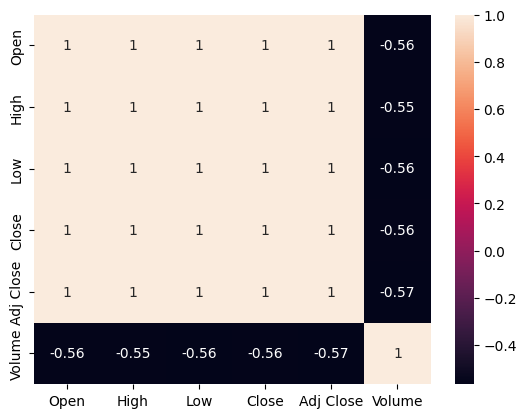

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

+ from this heatmap we can say there is a strong correlation between five columns that is open, high, low, close, adjacent close so we can choose any one from this for prediction. we choose close column to predict stock price.

### Boxplot (or Box-and-Whisker plot):

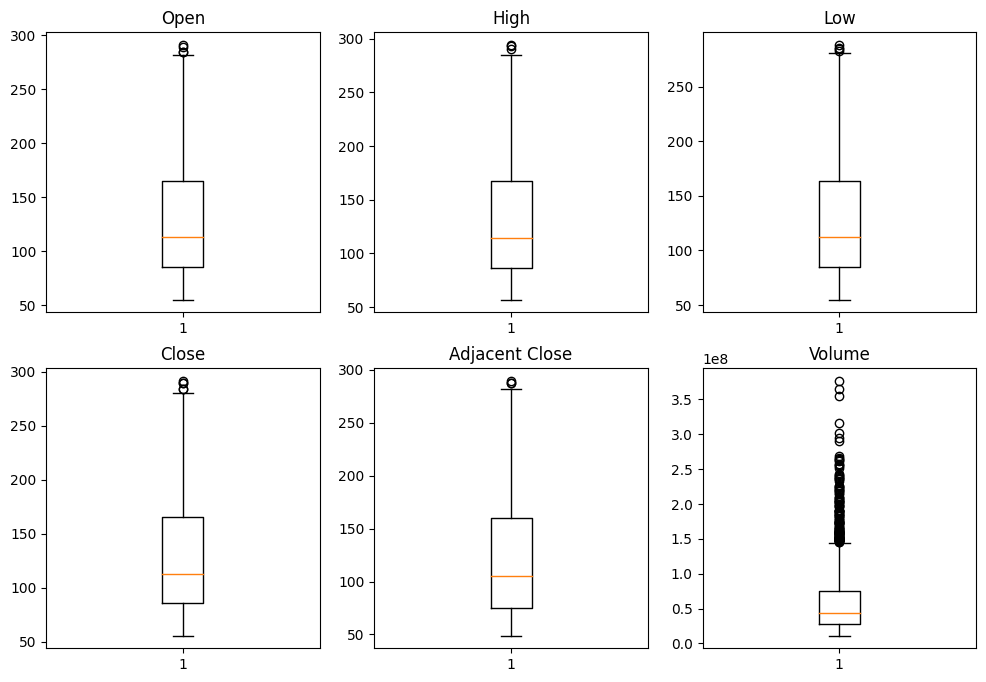

In [19]:
fig, ax = plt.subplots(2,3, figsize = (12,8))
ax[0,0].boxplot(df.Open);ax[0,0].set_title("Open")
ax[0,1].boxplot(df.High);ax[0,1].set_title("High")
ax[0,2].boxplot(df.Low);ax[0,2].set_title("Low")
ax[1,0].boxplot(df.Close);ax[1,0].set_title("Close")
ax[1,1].boxplot(df["Adj Close"]);ax[1,1].set_title("Adjacent Close")
ax[1,2].boxplot(df.Volume);ax[1,2].set_title("Volume")
plt.show()

+ As we Observe that there are minimum number of Outliers in every columns so we can neglect those outlier.
+ There are High no. of Outliers in 'Volume' column

In [20]:
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.strftime('%B')
df['day'] = df.index.strftime('%A')
df['quarter'] = df.index.quarter

### Yearwise Data distribution

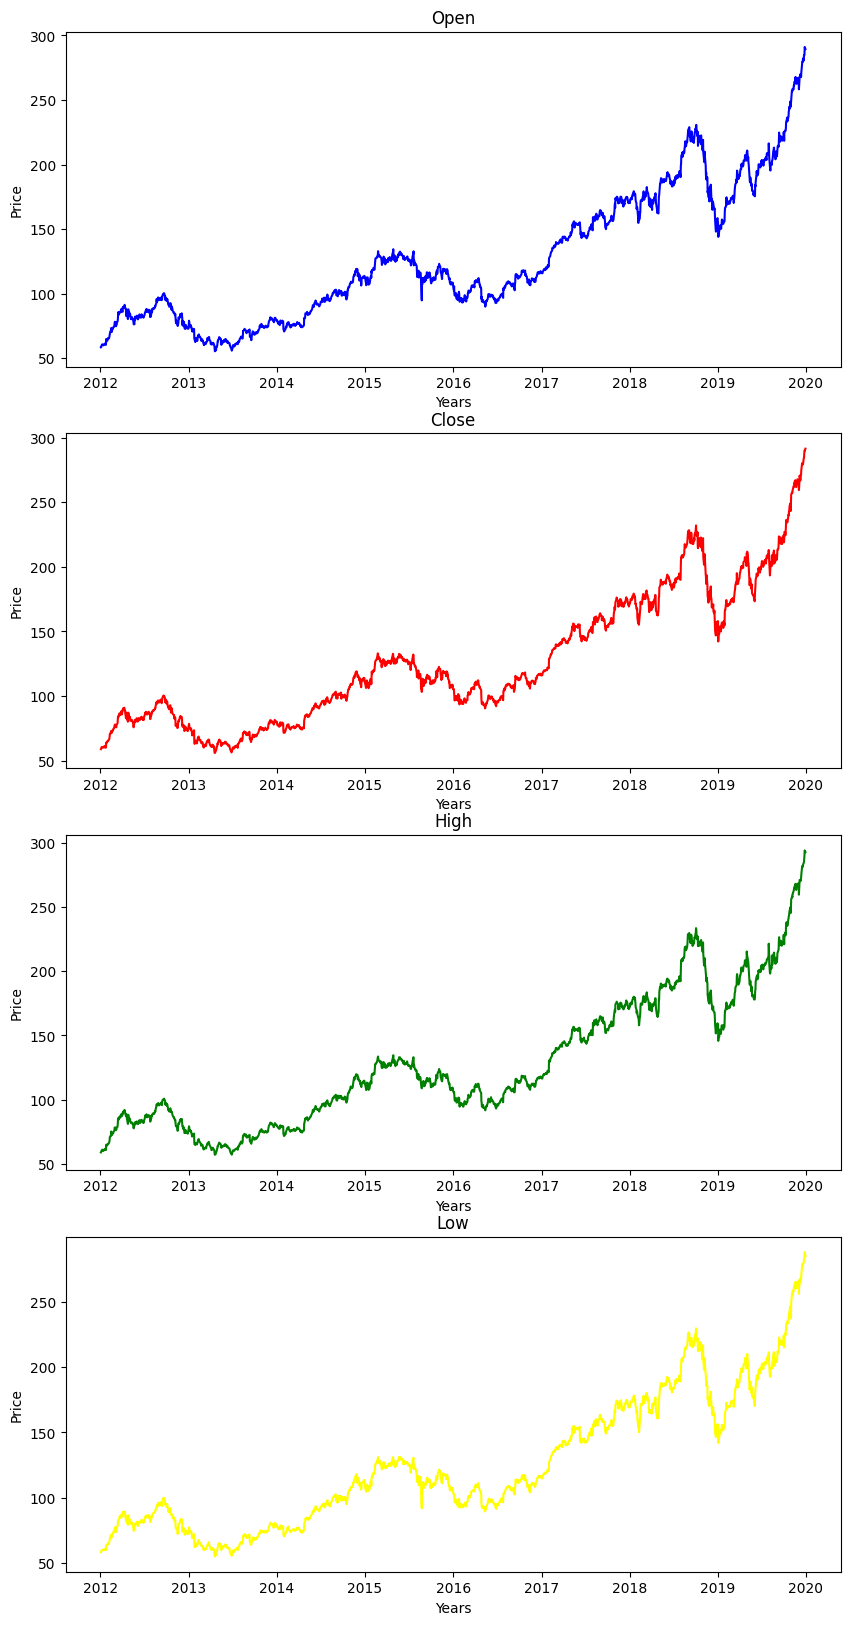

In [21]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(df.index, df['Open'], color = 'blue');plt.title("Open");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,2)
plt.plot(df.index, df['Close'], color = 'red');plt.title("Close");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,3)
plt.plot(df.index, df['High'], color = 'green');plt.title("High");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,4)
plt.plot(df.index, df['Low'], color = 'yellow');plt.title("Low");plt.xlabel("Years"); plt.ylabel('Price')
plt.show()

In [22]:
close_year = df.groupby("year")[["Close"]].sum()
close_year.head()

,Close
year,
2012,20573.26
2013,17014.84
2014,23250.73
2015,30250.08
2016,26360.21


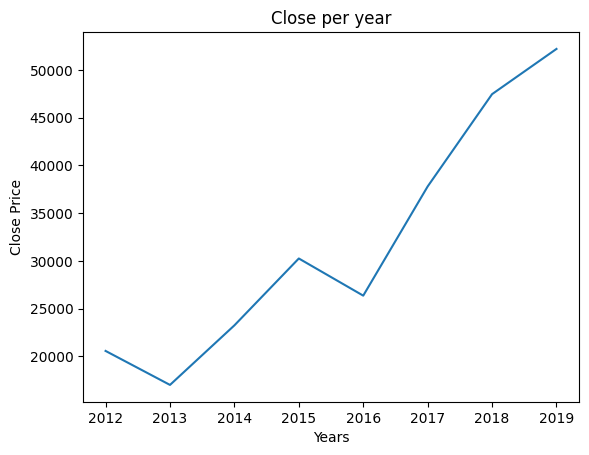

In [23]:
plt.plot(close_year);plt.xlabel("Years");plt.ylabel('Close Price');plt.title("Close per year")
plt.show()

In [24]:
close_month = df.groupby("month")[["Close"]].sum()
close_month.head()

,Close
month,
April,20080.78
August,23633.79
December,22603.49
February,17377.55
January,17696.30


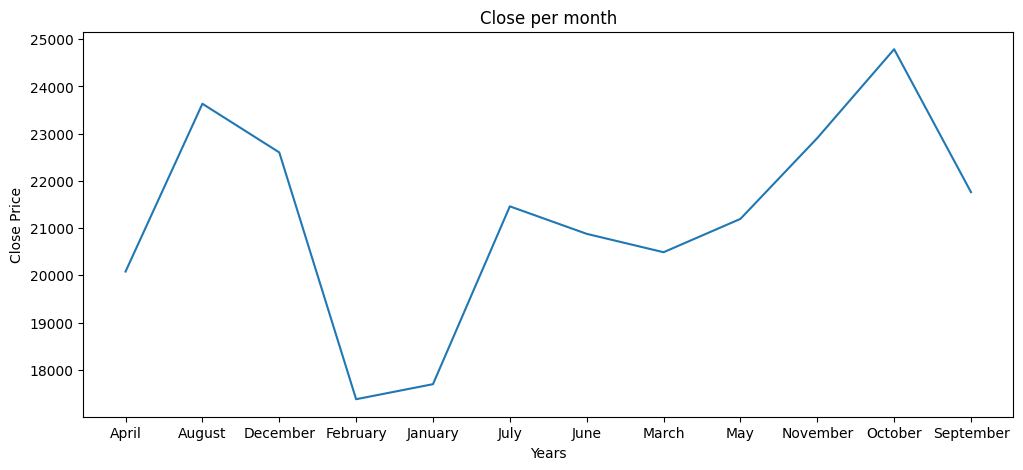

In [25]:
plt.figure(figsize=(12,5))
plt.plot(close_month);plt.xlabel("Years");plt.ylabel('Close Price');plt.title("Close per month")
plt.show()

In [26]:
close_day = df.groupby("day")[["Close"]].sum()
close_day.head()

,Close
day,
Friday,51380.35
Monday,48300.65
Thursday,51212.33
Tuesday,52038.07
Wednesday,51945.30


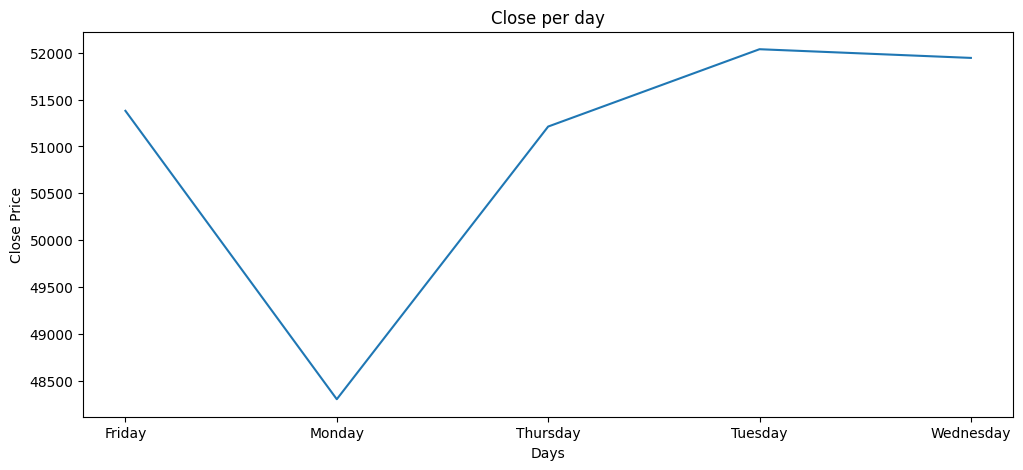

In [27]:
plt.figure(figsize=(12,5))
plt.plot(close_day);plt.xlabel("Days");plt.ylabel('Close Price');plt.title("Close per day")
plt.show()

### Monthly Close Stock Price data distribution

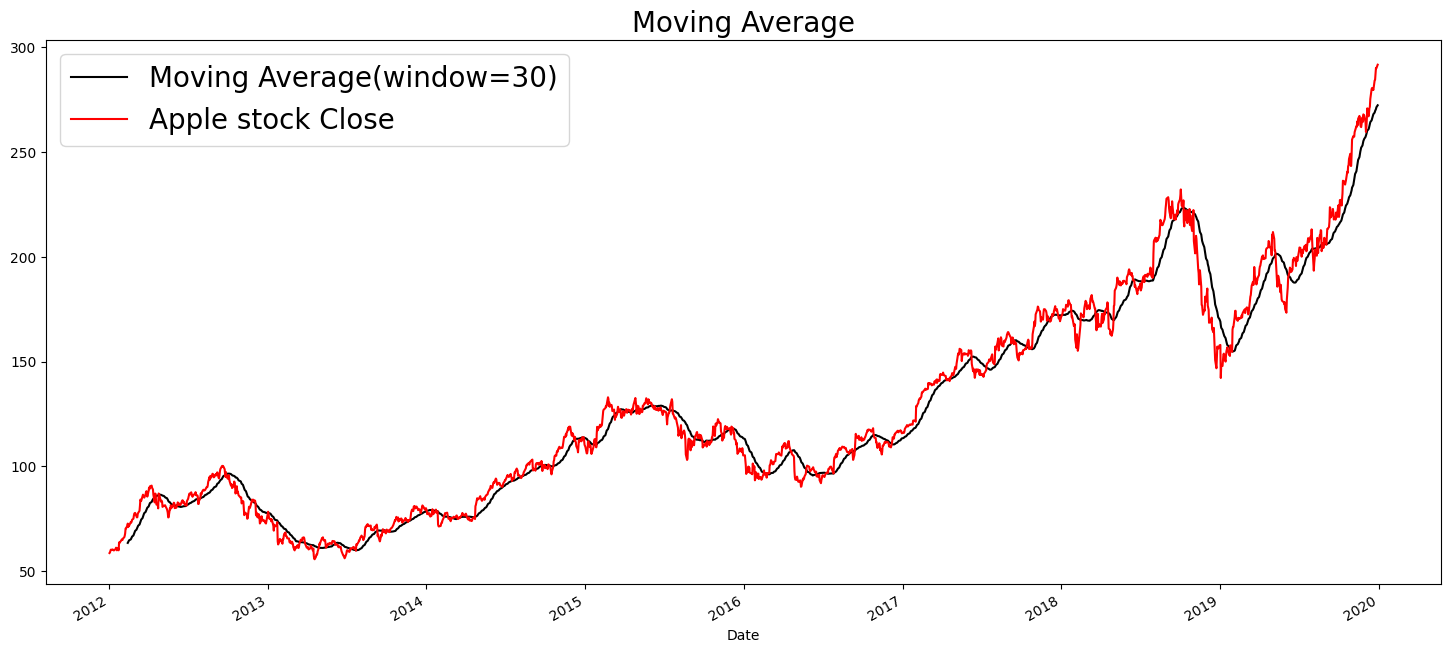

In [28]:
plt.figure(figsize=(18,8))
df['Close'].rolling(window=30).mean().plot(label='Moving Average(window=30)',color='black')
df['Close'].plot(label='Apple stock Close',color='red')
plt.title("Moving Average", fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

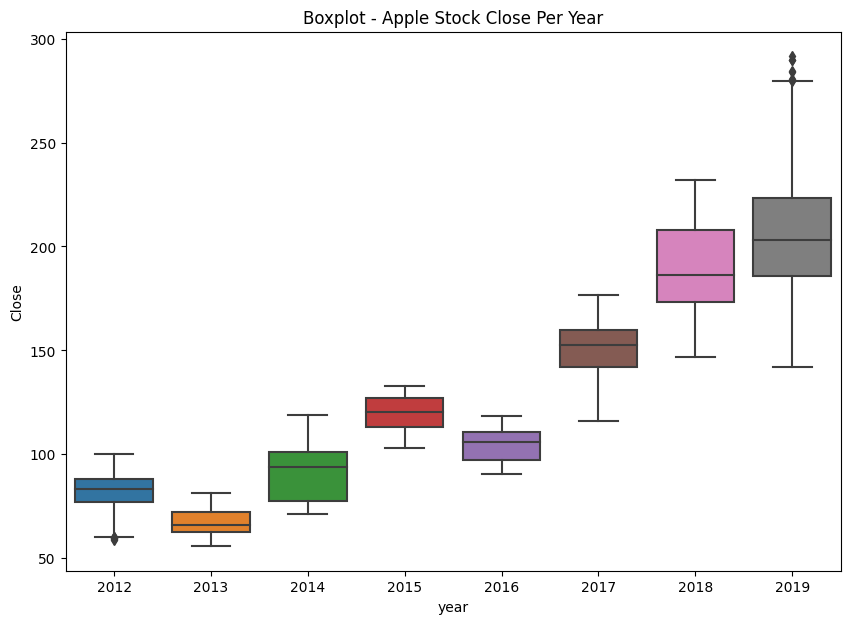

In [29]:
plt.figure(figsize = (10,7))
sns.boxplot(x=df['year'], y = df['Close'])
plt.title('Boxplot - Apple Stock Close Per Year')
plt.style.context('fivethirtyeight')
plt.show()

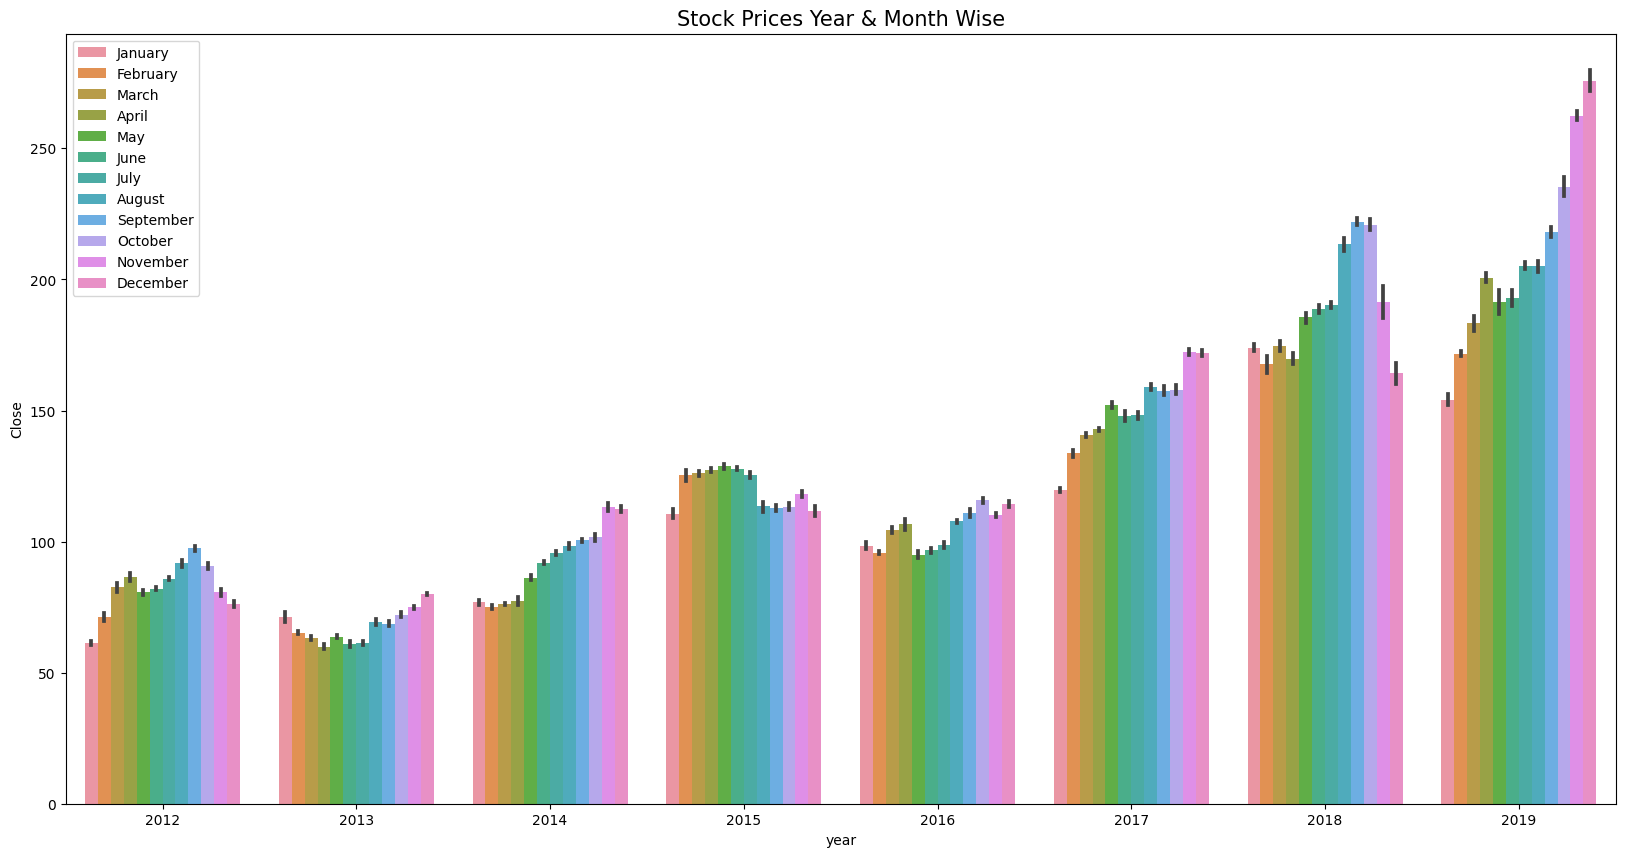

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("Paired", 4)
a = sns.barplot(x=df['year'], y=df["Close"],hue = df['month'],data=df['month'])
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

+ Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time.

In [31]:
# Resampling Data to Month by Aggregating using mean
monthly_mean = df['Close'].resample('M').mean()
monthly_df = monthly_mean.to_frame()
monthly_df

,Close
Date,
2012-01-31,61.225500
2012-02-29,71.082000
2012-03-31,82.500909
2012-04-30,86.572500
2012-05-31,80.667273
...,...
2019-08-31,204.957727
2019-09-30,217.995000
2019-10-31,235.286522


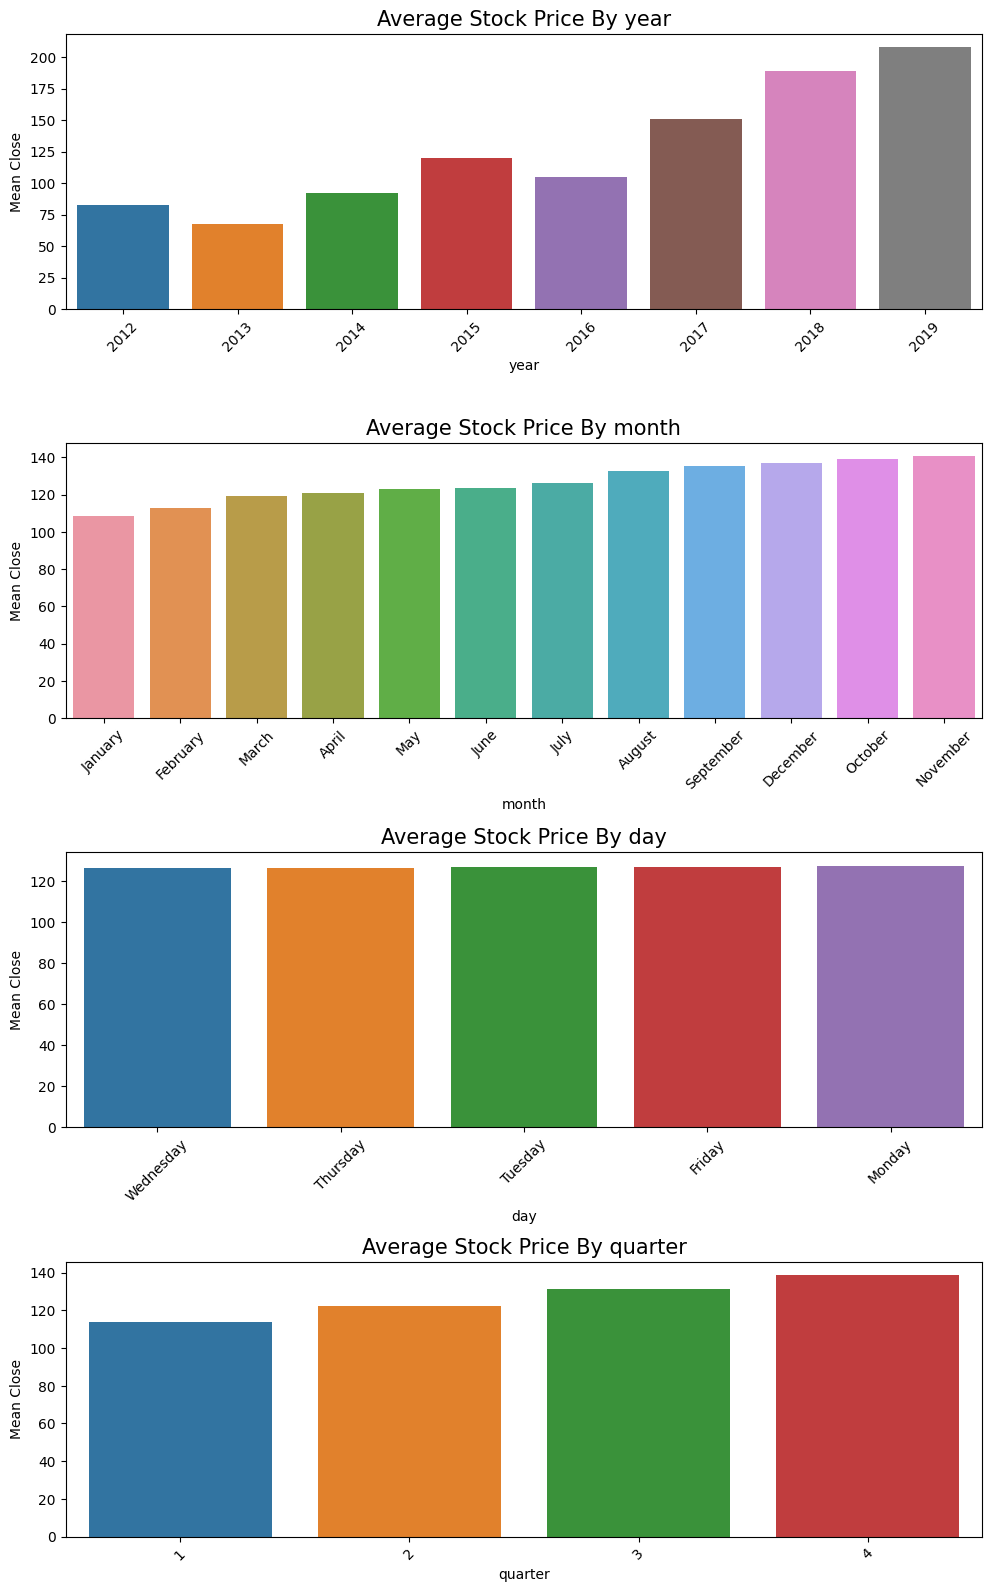

In [32]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = df.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
group_cols = group_cols.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(df.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

### Model Building
### Decomposition of Time Series

In [33]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 2000x1600 with 0 Axes>

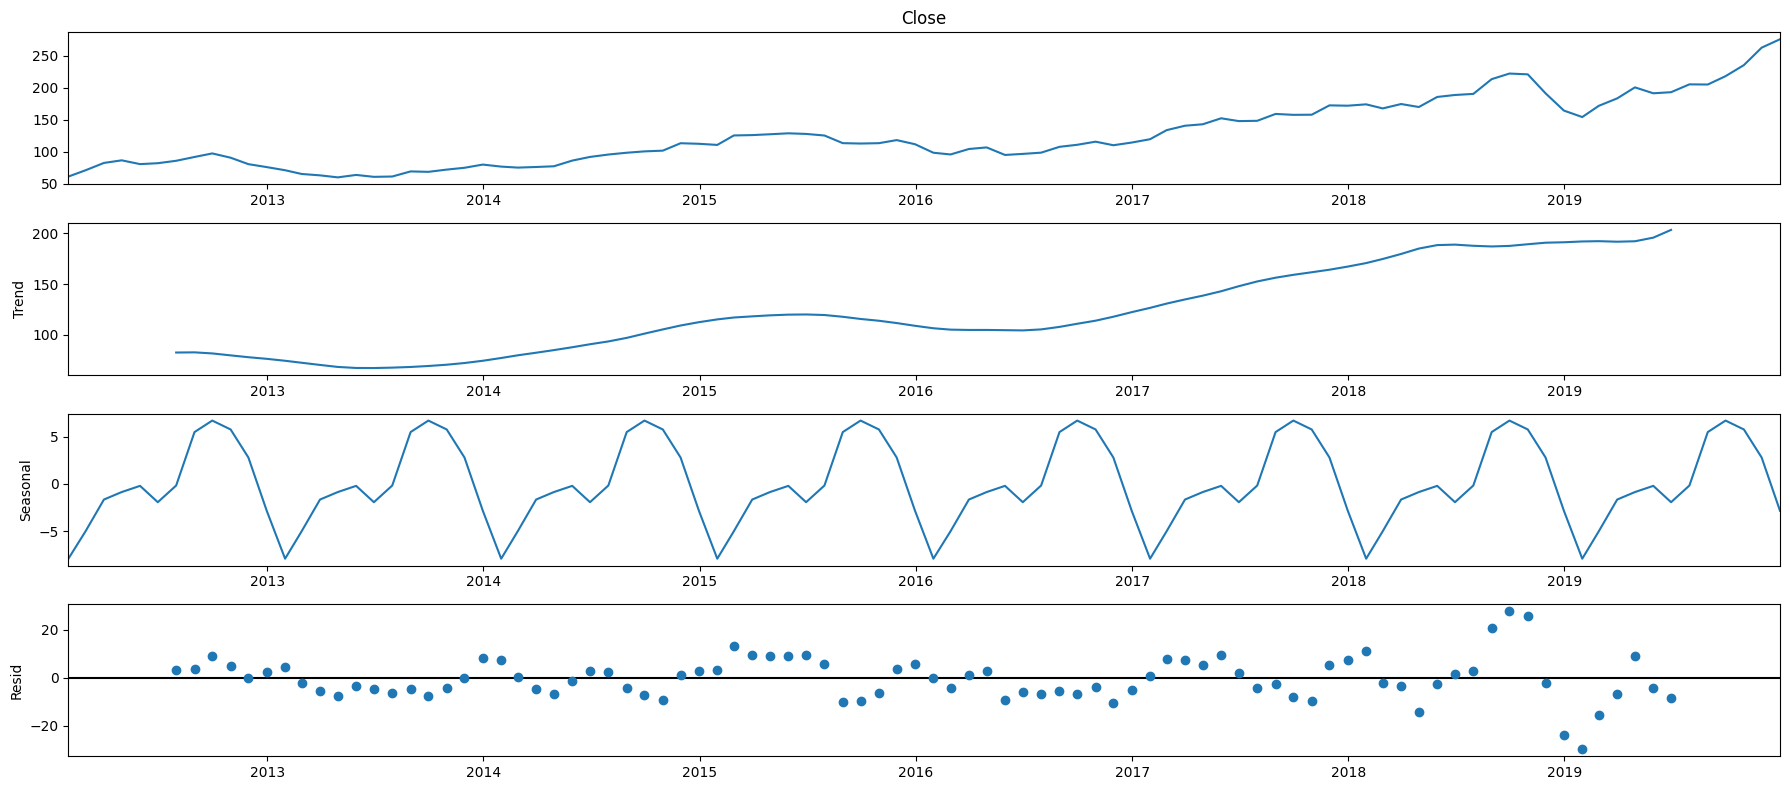

In [34]:
rcParams['figure.figsize']=18,8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_df['Close'],model='additive')
decomposed_series.plot()
plt.show()

+ Trend : Overall an Upward Trend

+ Seasonality :There appears to be seasonality,AAPLE has rallied during the last 3 Months of every year. Oct to Dec period has good sales for Apple Over the Years.
#### We can quite clearly see that the data has all 3, Levels, Trends, Seasonality.

### Plotting Rolling Statistics
+ We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

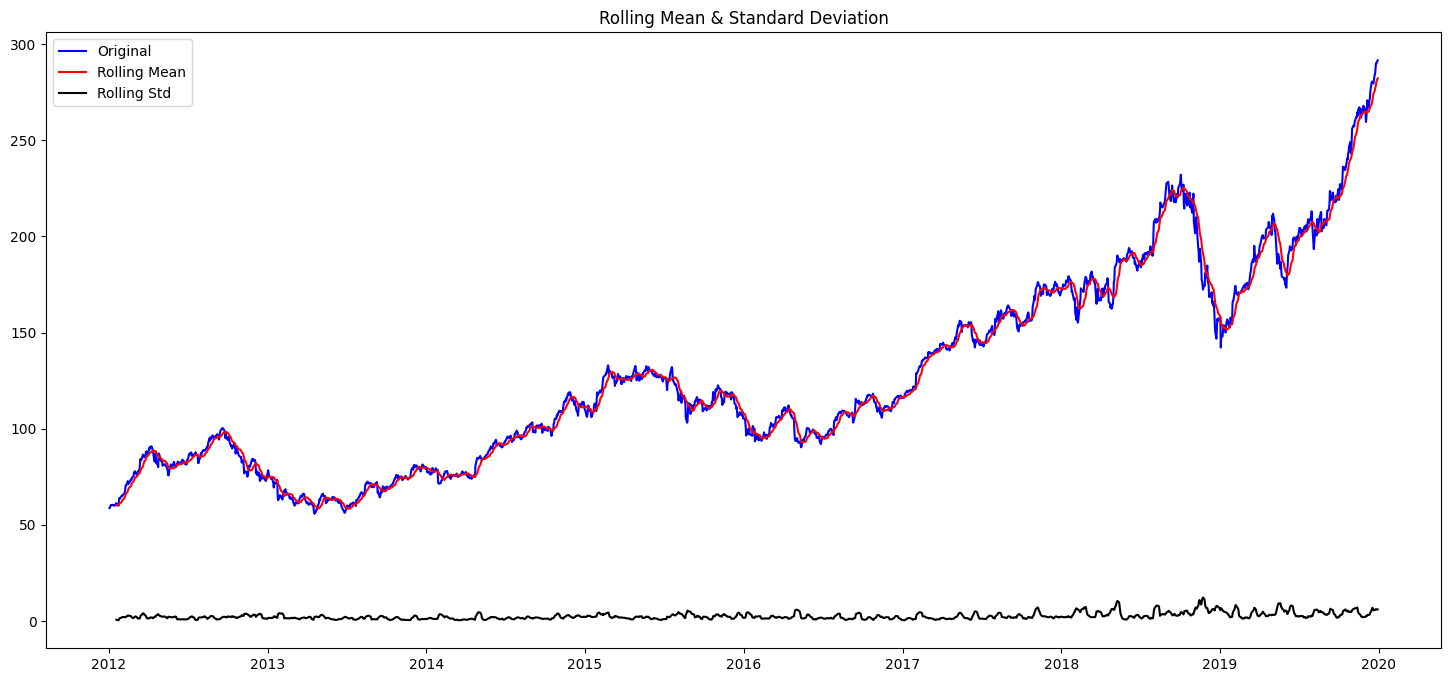

In [35]:
rolmean = df['Close'].rolling(12).mean()
rolstd = df['Close'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df['Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

+ We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
+ The time series is hence not stationary

### Test of Stationarity:
+ Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality

+ But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.

**ADF(Augmented Dickey-Fuller) Test**

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistic', 'p-value','#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(label+' : ' +str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis. Data is Stationary")
    else:
        print("Accept Null Hypothesis. Data is Non - Stationary")

In [38]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.2193479467002406
p-value : 0.9961168706935021
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


### Detrend

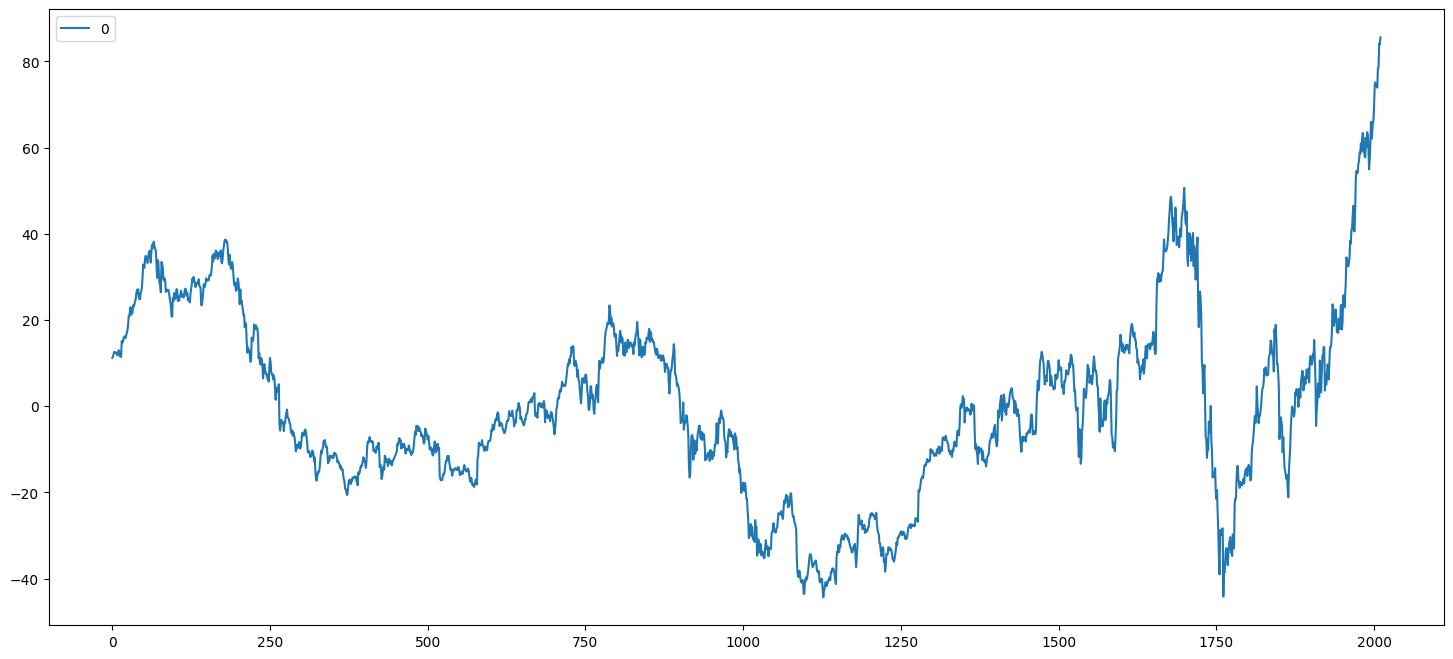

In [39]:
from scipy import signal
detrended = signal.detrend(df.Close)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [40]:
adfuller_test(detrended_df)

ADF Test Statistic : -0.7538890107192672
p-value : 0.8322931564204987
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


### Differencing

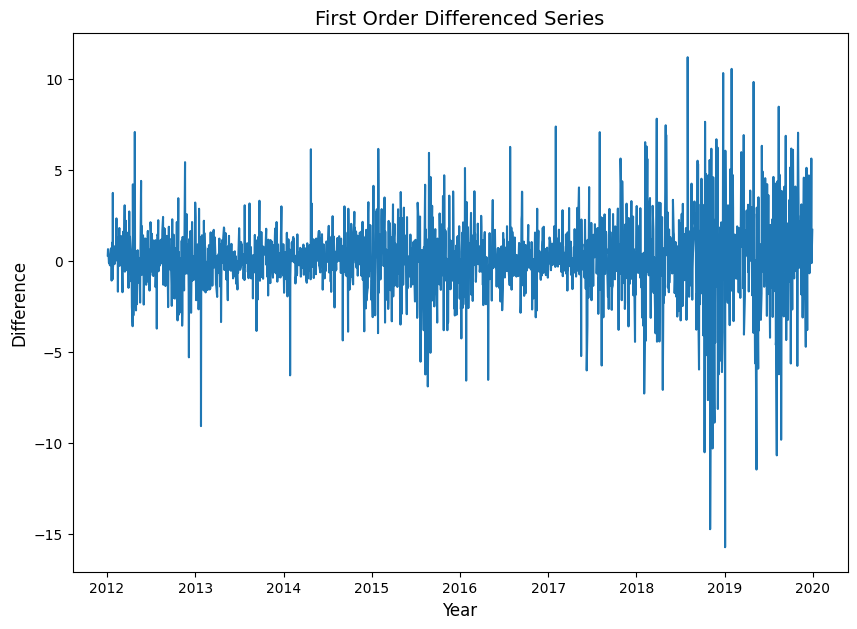

In [41]:
#Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
df['Diff'] = df['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(df['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [42]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistic : -13.625538376073834
p-value : 1.7630934279438352e-25
#Lags Used : 8
Number of Observations used : 2001
Reject Null Hypothesis. Data is Stationary


+ **Our Series is now stationary**

### ACF plots and PACF plots

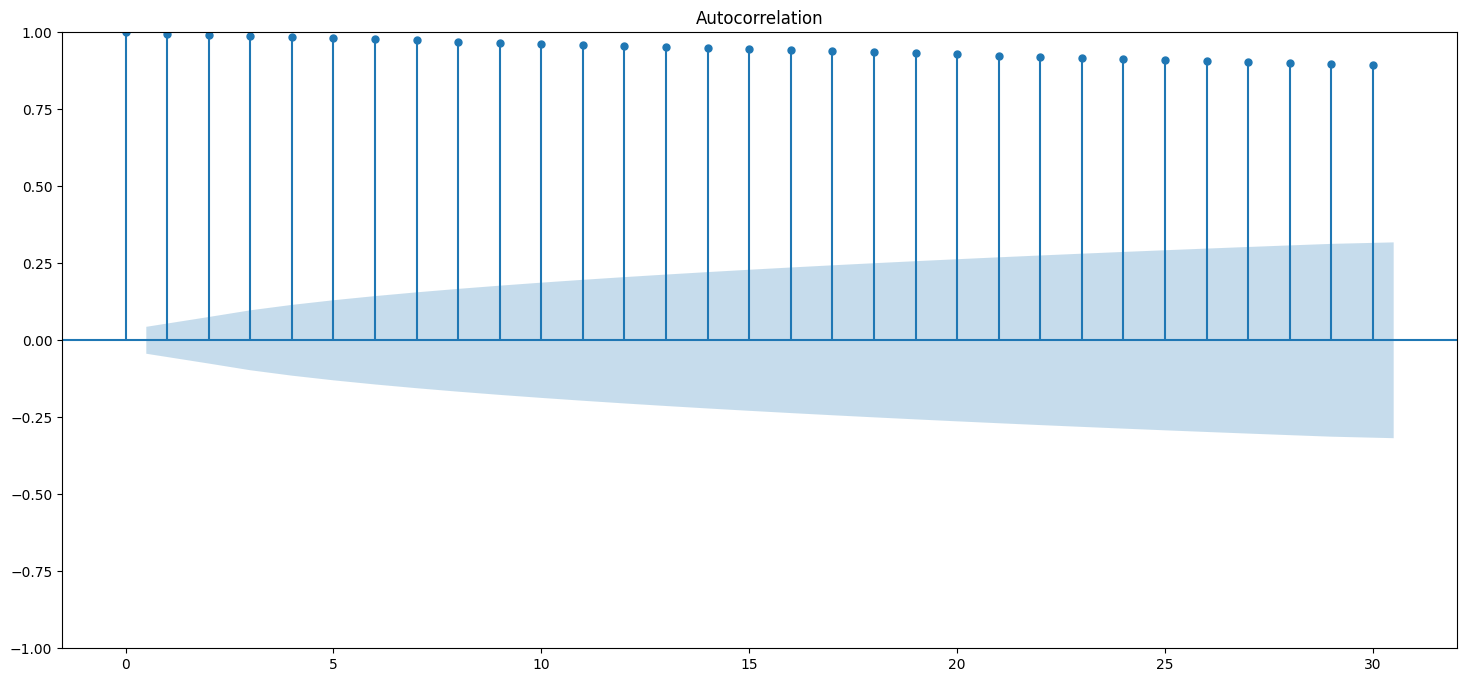

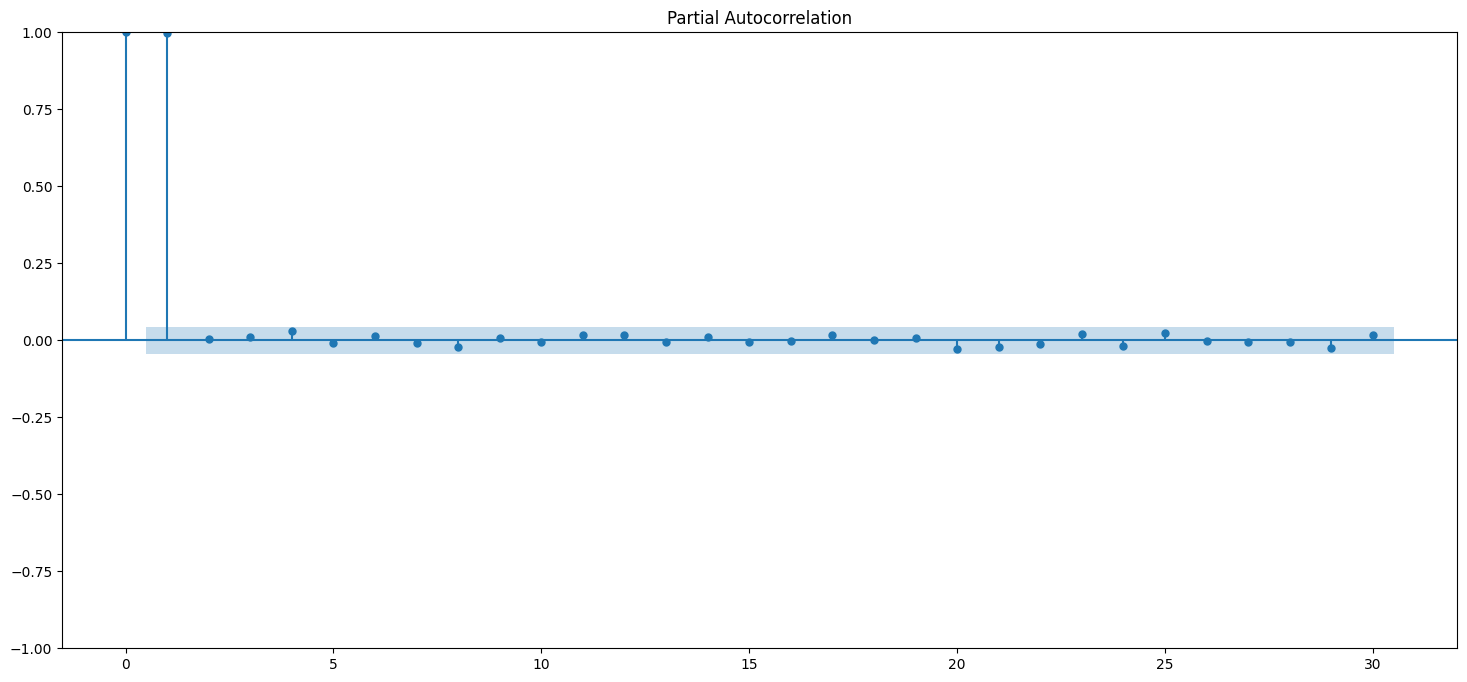

In [43]:
# Original Data
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Close'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Close'].dropna()),lags=30)
plt.show()

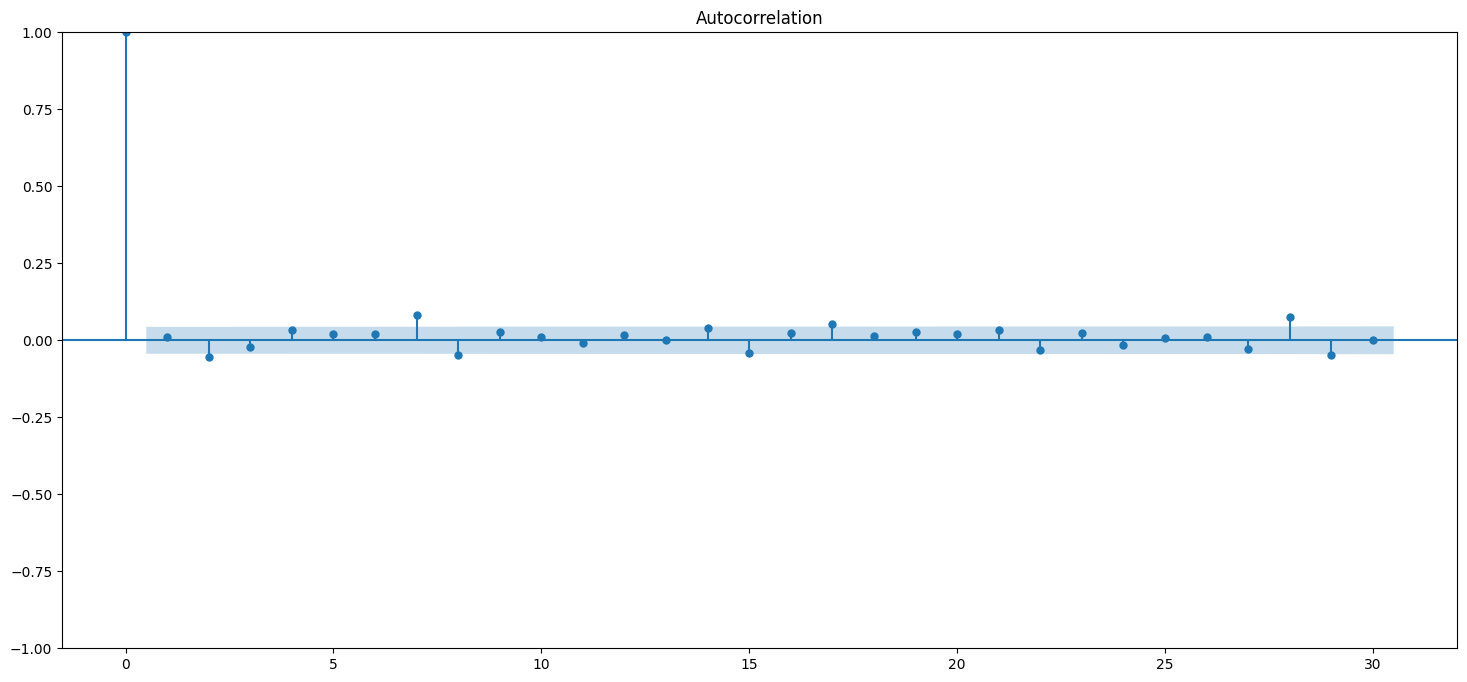

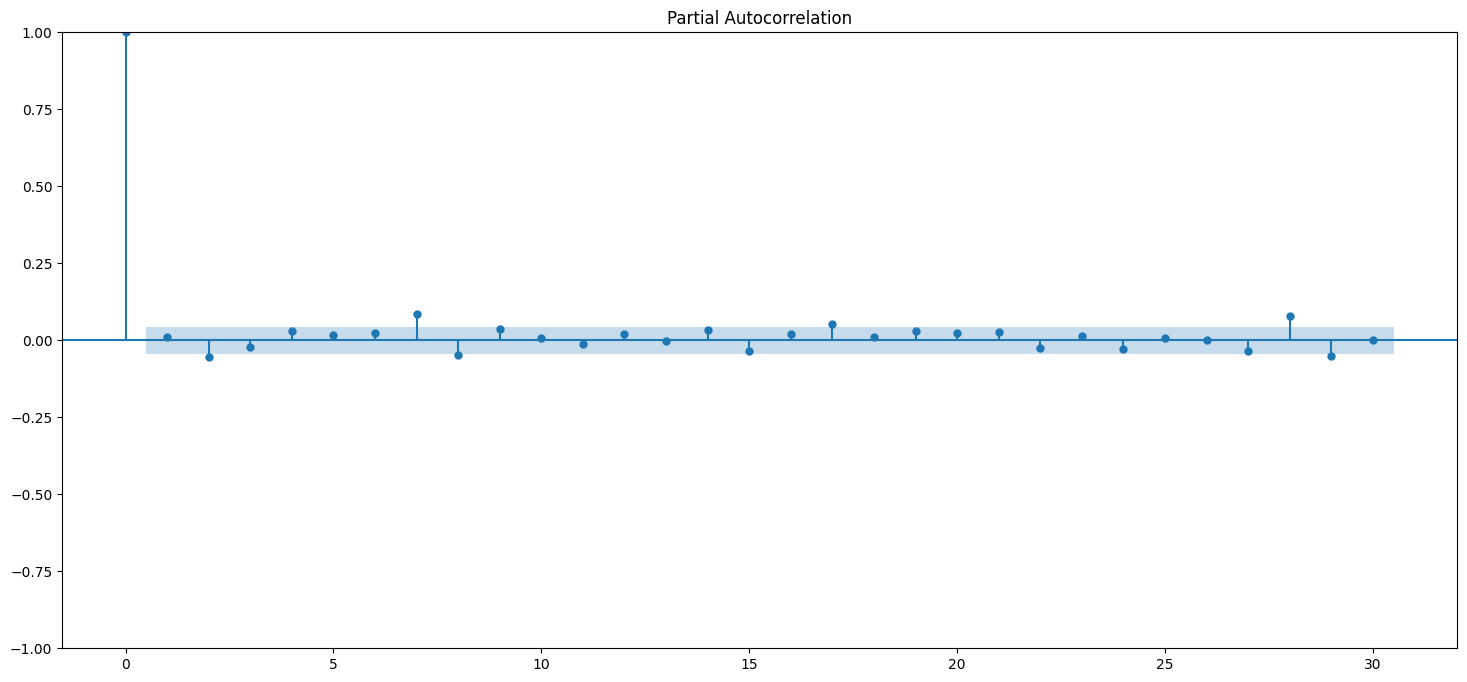

In [44]:
# After Differencing
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Diff'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Diff'].dropna()),lags=30)
plt.show()

#### We can also use the pmdarima package to get the number of differencing. (Alternate method)

In [45]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test = "adf")

1

**Interpreting ACF Plot:**
+ Slow decay of correlation values indicates that future values are heavily dependent on lagged values. This shows that series in not random and good for time series modelling.
+ It indicates MA(1) process

**Interpreting PACF Plot:**    
+ Sudden Decay at Lag-1, Order of series seems AR(1)  
+ Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1.
**Order Of Differencing is 1
#### p=1, d=1, q=1

### ARIMA Model

In [46]:
df.drop(["Open",'High','Low','Adj Close','Volume','year','month','day','quarter'], axis = 1, inplace = True)
# df.head()

In [47]:
df1=df.drop("Close", axis=1)
df1.head()

,Diff
Date,
2012-01-03,NaN
2012-01-04,0.31
2012-01-05,0.66
2012-01-06,0.62
2012-01-09,-0.09


In [48]:
df=df.drop("Diff", axis=1)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [49]:
split_date = "2018-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


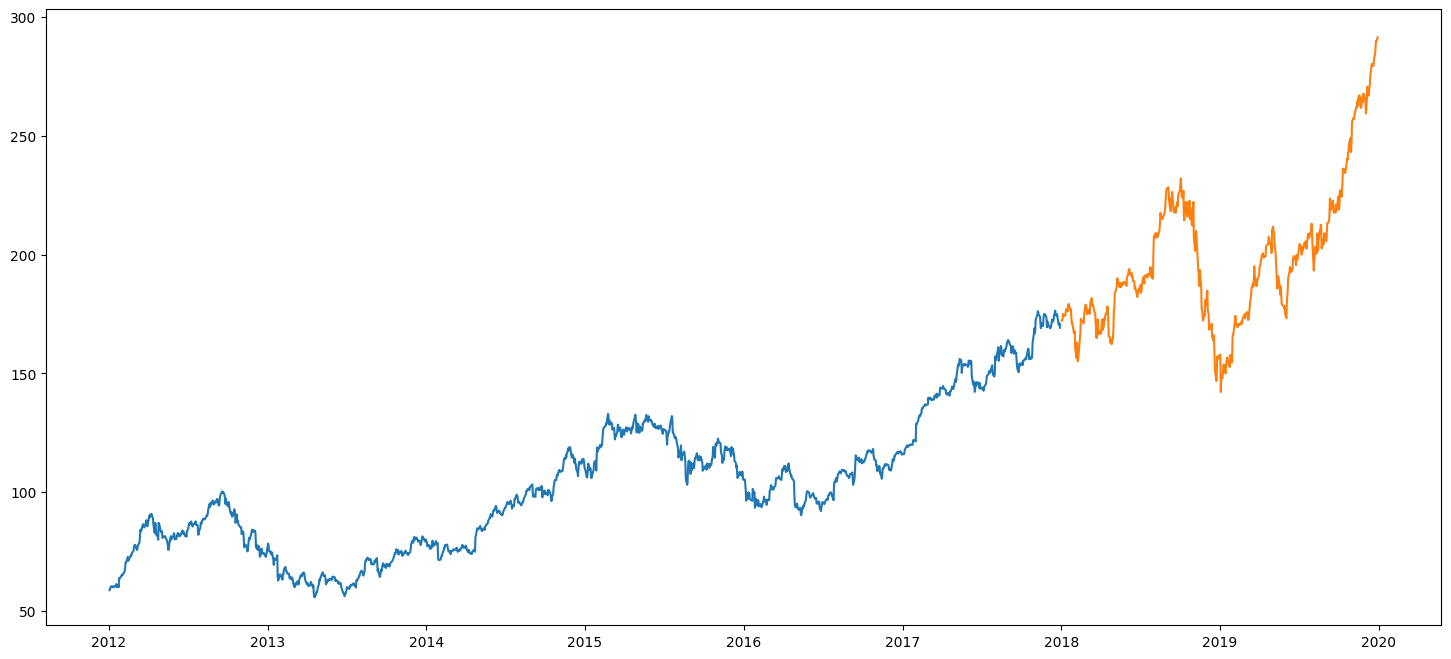

In [50]:
plt.plot(train)
plt.plot(test)
plt.show()

In [51]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [52]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5589.856, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=1.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=2.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=0.69 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.542, Time=2.31 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5590.958, Time=0.89 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2788.928
Date:                Fri, 02 Dec 2022   AIC                           5589.856
Time:                        21:33:14   BIC                           5621.767
Sample:                             0   HQIC                          5601.741
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1218      0.058      2.119      0.034       0.009       0.235
ar.L1          0.5588      0.014     41.313      0.000       0.532       0.585
ar.L2         -0.9856      0.013    -73.141      0.000      -1.012      -0.959
ma.L1         -0.5677      0.017    -33.092      0.000      -0.601      -0.534
ma.L2          0.9778      0.017     57.310      0.000       0.944       1.011
sigma2         2.3949      0.054     44.600      0.000       2.290       2.500
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):               843.10
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### (1,1,1)

In [53]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Close'],order = (3,1,3))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2791.780
Date:                Fri, 02 Dec 2022   AIC                           5597.561
Time:                        21:33:16   BIC                           5634.791
Sample:                             0   HQIC                          5611.427
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3154      4.032     -0.078      0.938      -8.218       7.587
ar.L2          0.1840      4.787      0.038      0.969      -9.199       9.567
ar.L3          0.7300      3.430      0.213      0.831      -5.994       7.454
ma.L1          0.3507      4.024      0.087      0.931      -7.537       8.239
ma.L2         -0.1834      4.918     -0.037      0.970      -9.823       9.456
ma.L3         -0.7590      3.550     -0.214      0.831      -7.716       6.198
sigma2         2.3743      0.053     44.618      0.000       2.270       2.479
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               857.29
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.096267
2018-01-03,169.201029
2018-01-04,169.196072
2018-01-05,169.119286
2018-01-08,169.219073
...,...
2019-12-23,169.184016
2019-12-24,169.184016
2019-12-26,169.184016


In [55]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.096267
2018-01-03      169.201029
2018-01-04      169.196072
2018-01-05      169.119286
2018-01-08      169.219073
...                    ...
2019-12-23      169.184016
2019-12-24      169.184016
2019-12-26      169.184016
2019-12-27      169.184016
2019-12-30      169.184016

[502 rows x 1 columns]


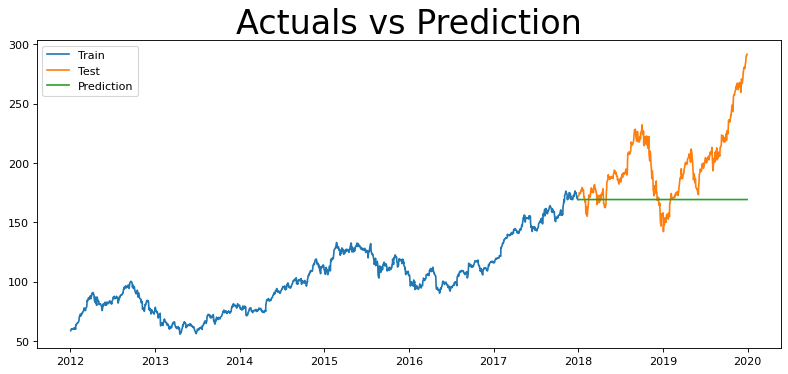

In [56]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [58]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1740.5680541375837
Root Mean Squared Error (RMSE) =  41.72
Mean Absolute Error (MAE)  =  31.5905356080205
Mean Absolute Percentage Error (MAPE)  =  0.18672299537310516


**RMSE : It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.**
#### Mean absolute error: 
**It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors. MAE measures only the magnitude of the errors and doesn’t concern itself with their direction. The lower the MAE, the higher the accuracy of a model.**

### Forecast for 30 Days

In [59]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast.index=index_future_dates
print(forecast)

2019-12-30    169.184016
2019-12-31    169.184016
2020-01-01    169.184016
2020-01-02    169.184016
2020-01-03    169.184016
2020-01-04    169.184016
2020-01-05    169.184016
2020-01-06    169.184016
2020-01-07    169.184016
2020-01-08    169.184016
2020-01-09    169.184016
2020-01-10    169.184016
2020-01-11    169.184016
2020-01-12    169.184016
2020-01-13    169.184016
2020-01-14    169.184016
2020-01-15    169.184016
2020-01-16    169.184016
2020-01-17    169.184016
2020-01-18    169.184016
2020-01-19    169.184016
2020-01-20    169.184016
2020-01-21    169.184016
2020-01-22    169.184016
2020-01-23    169.184016
2020-01-24    169.184016
2020-01-25    169.184016
2020-01-26    169.184016
2020-01-27    169.184016
2020-01-28    169.184016
2020-01-29    169.184016
2020-01-30    169.184016
Freq: D, Name: predicted_mean, dtype: float64


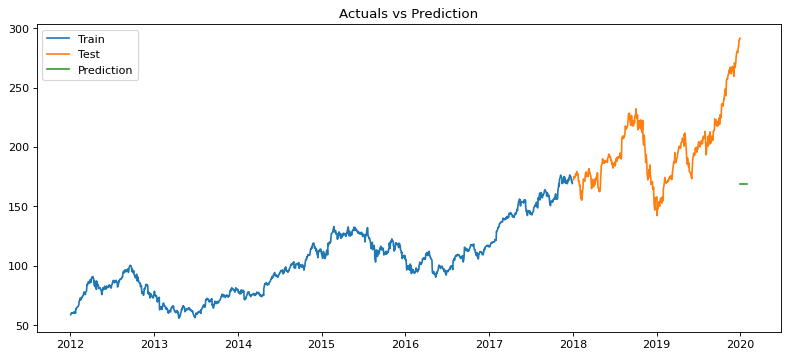

In [60]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<AxesSubplot: >

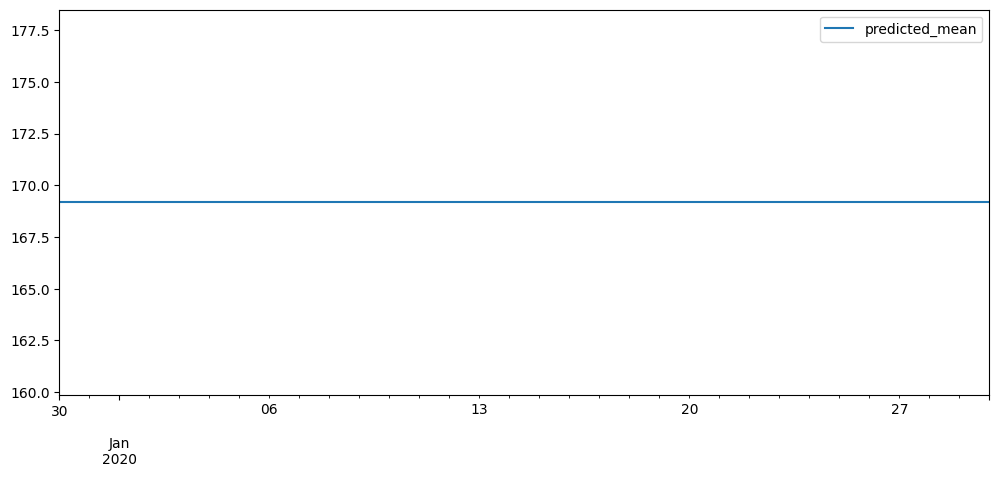

In [61]:
forecast.plot(figsize=(12,5), legend=True)

### SARIMA

In [62]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [63]:
model_SA = sm.tsa.SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,5))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 1509
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -2800.054
Date:                           Fri, 02 Dec 2022   AIC                           5610.108
Time:                                   21:33:18   BIC                           5636.684
Sample:                                        0   HQIC                          5620.008
                                          - 1509                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7600      0.344     -2.208      0.027      -1.435      -0.085
ma.L1          0.7788      0.335      2.323      0.020       0.122       1.436
ar.S.L5        0.0007      0.025      0.027      0.978      -0.049       0.050
ma.S.L5       -0.9999      0.516     -1.937      0.053      -2.012       0.012
sigma2         2.3850      1.227      1.943      0.052      -0.021       4.791
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               774.17
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,169.293243
2018-01-03,169.334771
2018-01-04,169.401759
2018-01-05,169.435832
2018-01-08,169.589176
...,...
2019-12-23,205.655931
2019-12-24,205.687959
2019-12-26,205.843997


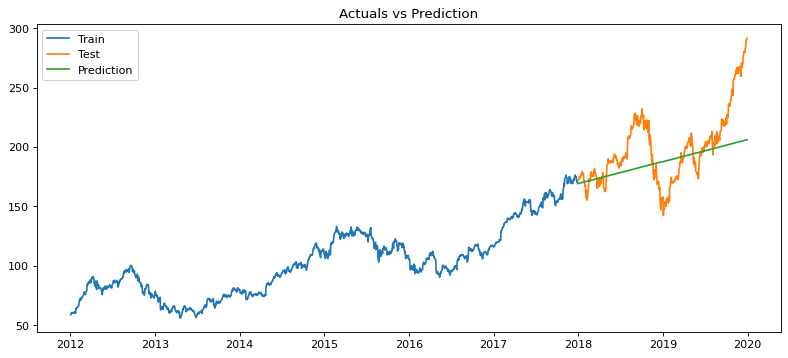

In [65]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [66]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  719.8132769137897
Root Mean Squared Error (RMSE) =  26.83
Mean Absolute Error (MAE)  =  19.802949265571108
Mean Absolute Percentage Error (MAPE)  =  0.10357448595013233


### Forecast for next 30 days

In [67]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-30    206.022136
2019-12-31    206.054163
2020-01-01    206.210202
2020-01-02    206.277453
2020-01-03    206.319038
2020-01-04    206.388341
2020-01-05    206.420368
2020-01-06    206.576407
2020-01-07    206.643657
2020-01-08    206.685243
2020-01-09    206.754545
2020-01-10    206.786572
2020-01-11    206.942611
2020-01-12    207.009862
2020-01-13    207.051447
2020-01-14    207.120750
2020-01-15    207.152777
2020-01-16    207.308816
2020-01-17    207.376066
2020-01-18    207.417652
2020-01-19    207.486954
2020-01-20    207.518982
2020-01-21    207.675020
2020-01-22    207.742271
2020-01-23    207.783856
2020-01-24    207.853159
2020-01-25    207.885186
2020-01-26    208.041225
2020-01-27    208.108476
2020-01-28    208.150061
2020-01-29    208.219364
2020-01-30    208.251391
Freq: D, Name: predicted_mean, dtype: float64


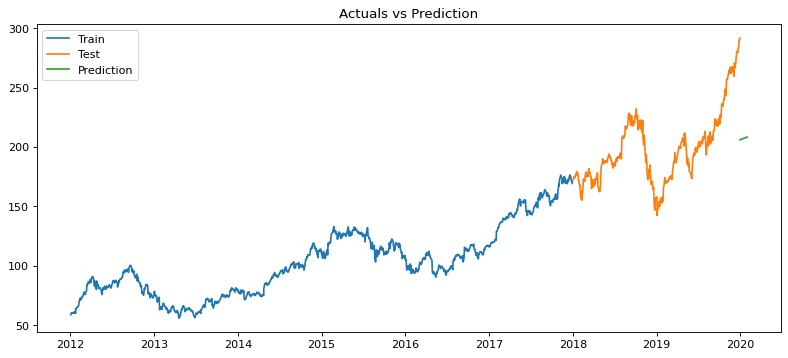

In [68]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Holt Method

In [69]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

<AxesSubplot: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

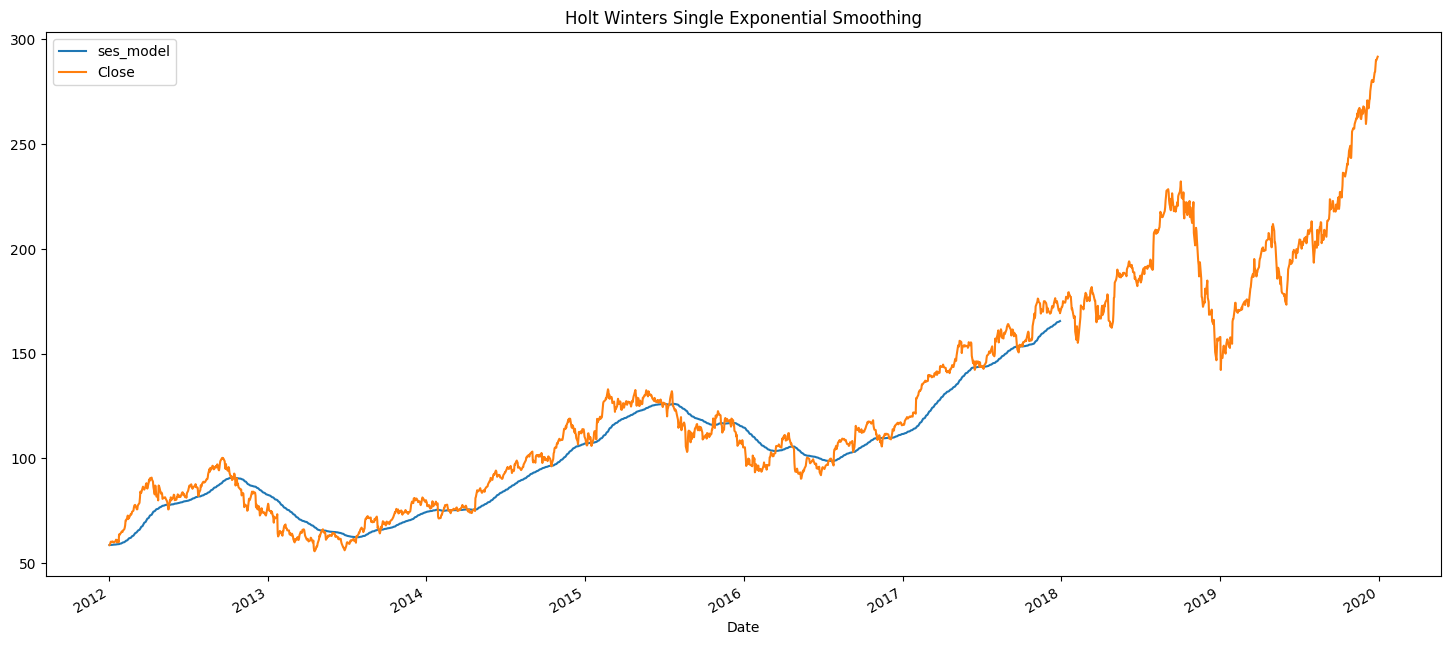

In [71]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["Close"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','Close']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
# df2['ses_model']

As expected, it didn’t fit quite well, and rightfully so, because if we remember, Single ES doesn’t work for data with Trends and Seasonality.
#### Double HWES
So, we’d fit the data on Double ES, on both Additive and Multiplicative Trend,

<AxesSubplot: title={'center': 'Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend'}, xlabel='Date'>

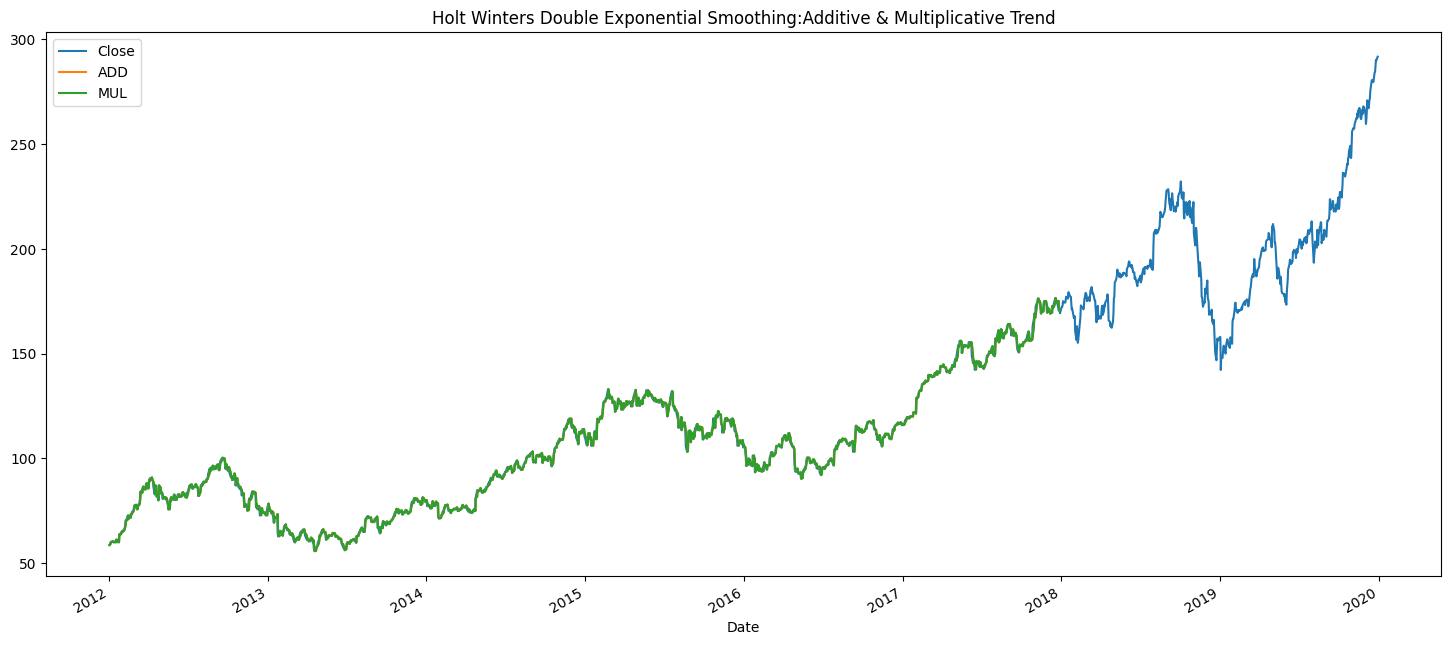

In [72]:
df['ADD'] = ExponentialSmoothing(train['Close'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['Close'],trend='mul').fit().fittedvalues
df[['Close','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')

This looks promising! Here we have plotted for both Additive and Multiplicative Seasonality.

#### Forecasting with Holt-Winters Exponential Smoothing (Triple ES) : 
Let’s try and forecast sequences, let us start by dividing the dataset into Train and Test Set. We have taken 1509 data points as Train set and the last 502 data points as Test Set.

In [82]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.363357
2018-01-03    169.619170
2018-01-04    169.811215
2018-01-05    169.665437
2018-01-08    169.960011
                 ...    
2019-12-23    232.205734
2019-12-24    232.939077
2019-12-26    232.506606
2019-12-27    232.265497
2019-12-30    232.314420
Length: 502, dtype: float64


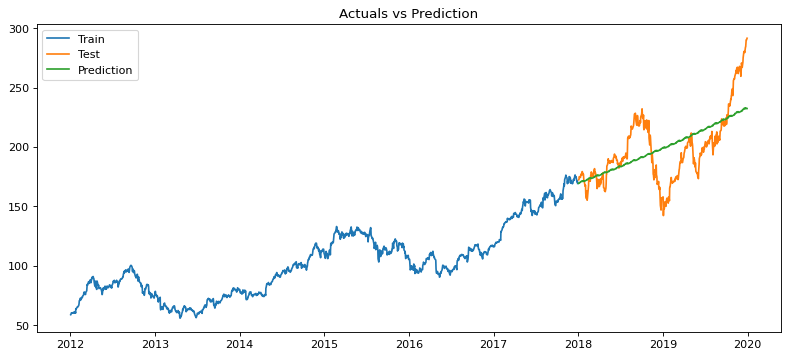

In [83]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [84]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  524.6945010335063
Root Mean Squared Error (RMSE) =  22.91
Mean Absolute Error (MAE)  =  18.20137229641599
Mean Absolute Percentage Error (MAPE)  =  0.09250006158251624


In [85]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.329825
2018-01-03    169.550242
2018-01-04    169.708751
2018-01-05    169.528536
2018-01-08    169.787600
                 ...    
2019-12-23    206.135513
2019-12-24    206.729201
2019-12-26    206.290537
2019-12-27    206.020956
2019-12-30    206.006664
Length: 502, dtype: float64


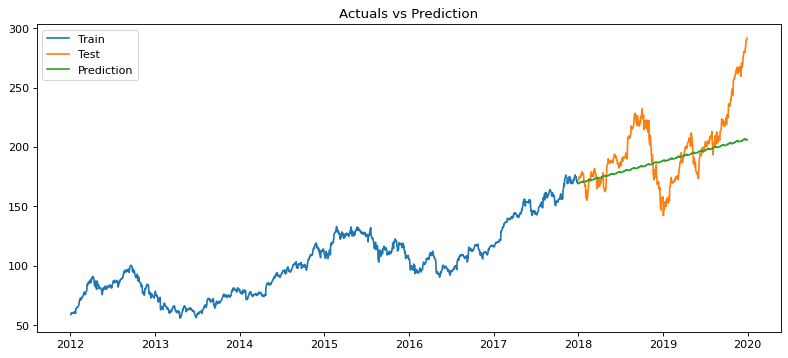

In [86]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [87]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  709.6392407360221
Root Mean Squared Error (RMSE) =  26.64
Mean Absolute Error (MAE)  =  19.633894958808746
Mean Absolute Percentage Error (MAPE)  =  0.09347394602060091


In [88]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.337403
2018-01-03    169.484282
2018-01-04    169.629517
2018-01-05    169.585695
2018-01-08    169.780548
                 ...    
2019-12-23    231.638136
2019-12-24    232.021276
2019-12-26    231.889557
2019-12-27    231.982918
2019-12-30    232.098768
Length: 502, dtype: float64


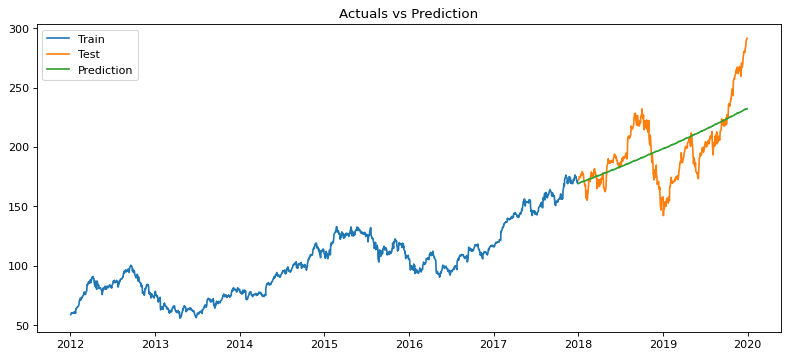

In [89]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [90]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  524.3363992173264
Root Mean Squared Error (RMSE) =  22.9
Mean Absolute Error (MAE)  =  18.163307984959754
Mean Absolute Percentage Error (MAPE)  =  0.09214133436297972


In [91]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.303984
2018-01-03    169.417376
2018-01-04    169.529153
2018-01-05    169.451813
2018-01-08    169.613157
                 ...    
2019-12-23    205.876900
2019-12-24    206.187631
2019-12-26    205.983439
2019-12-27    206.004319
2019-12-30    206.047660
Length: 502, dtype: float64


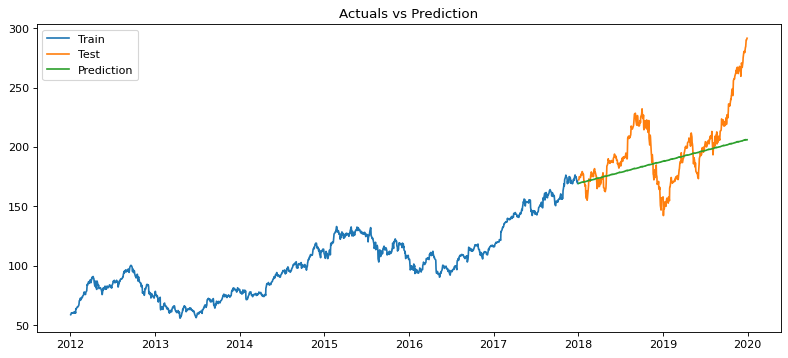

In [92]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [93]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  715.4440053803161
Root Mean Squared Error (RMSE) =  26.75
Mean Absolute Error (MAE)  =  19.731256195375117
Mean Absolute Percentage Error (MAPE)  =  0.09385609201304636


### EMA

In [76]:
df['EMA'] = df.iloc[:,0].ewm(span=22).mean()

In [77]:
df.head()

,Close,ses_model,ADD,MUL,EMA
Date,,,,,
2012-01-03,58.75,58.750000,58.749993,58.750474,58.750000
2012-01-04,59.06,58.750000,58.823263,58.786864,58.912045
2012-01-05,59.72,58.757045,59.133263,59.097058,59.206201
2012-01-06,60.34,58.778931,59.793263,59.757473,59.529419
2012-01-09,60.25,58.814410,60.413263,60.377863,59.700871


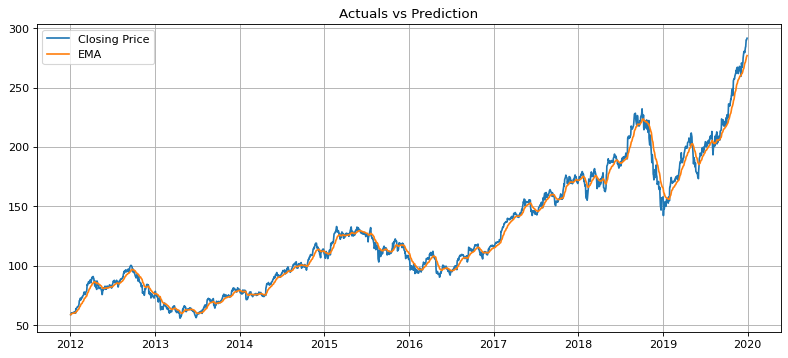

In [78]:
plt.figure(figsize=(12,5), dpi=80)
plt.grid(True)
plt.plot(df['Close'],label='Closing Price')
plt.plot(df['EMA'],label='EMA')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.legend(loc=2)

+ So as you can observe from the graph above, that the Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data while the Cumulative Moving Average (CMA) lacks by a considerable margin.

In [79]:
mse = mean_squared_error(df['Close'],df['EMA'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(df['Close'],df['EMA'])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(df['Close'],df['EMA'])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  26.33389451257977
Root Mean Squared Error (RMSE) =  5.13
Mean Absolute Error (MAE)  =  3.7873269895636694
Mean Absolute Percentage Error (MAPE)  =  0.029755854055632858
